### Naive Bayes ZSCORE

True
True
0.5778549114890663


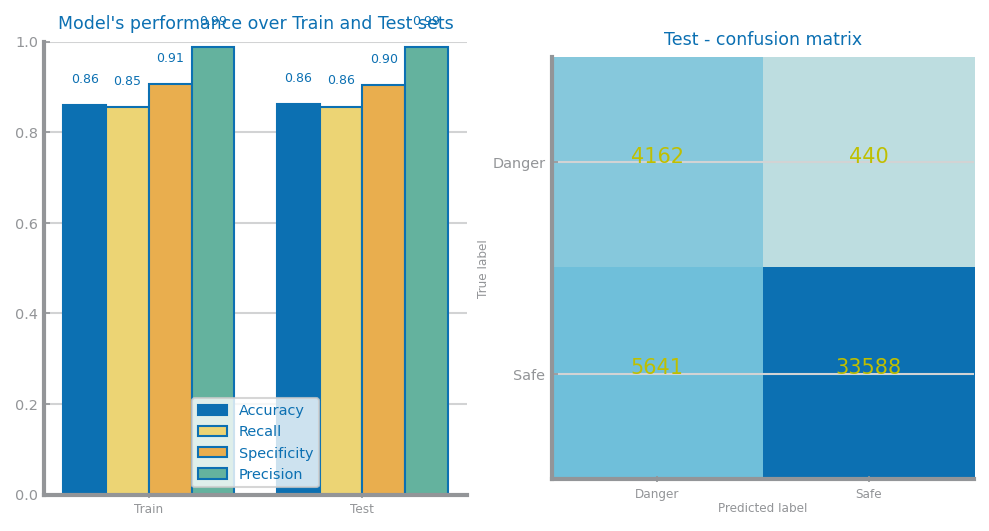

In [ ]:
### FILES
file_tag_zscore = 'air_quality_scaled_zscore'
filename_zscore = 'data/air_quality_scaled_zscore'

file_tag_minmax = 'ait_quality_scaled_minmax'
filename_minmax = 'data/air_quality_scaled_minmax'

target = 'ALARM'
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB


train_zscore: DataFrame = read_csv(f'{filename_zscore}_train.csv')
test_zscore: DataFrame = read_csv(f'{filename_zscore}_test.csv')

print(len(train_zscore.columns) == len(test_zscore.columns))

#train_zscore.drop(['CRASH_DATE','CRASH_TIME','PERSON_ID'], axis=1, inplace=True)
#test_zscore.drop(['CRASH_DATE','CRASH_TIME'],axis=1, inplace=True) #,'PERSON_ID'

print(len(train_zscore.columns) == len(test_zscore.columns))

trnY_zscore: np.ndarray = train_zscore.pop(target).values
trnX_zscore: np.ndarray = train_zscore.values
labels = unique(trnY_zscore)
labels.sort()

tstY_zscore: np.ndarray = test_zscore.pop(target).values
tstX_zscore: np.ndarray = test_zscore.values

clf = BernoulliNB()
clf.fit(trnX_zscore, trnY_zscore)
prd_trn = clf.predict(trnX_zscore)
prd_tst = clf.predict(tstX_zscore)
print(f1_score(tstY_zscore, prd_tst, pos_label='Danger'))
plot_evaluation_results(labels, trnY_zscore, prd_trn, tstY_zscore, prd_tst)
savefig('lab3_imagens/air_quality_nb_best_zscore.png')
show()

### Naive Bayes MINMAX

True
True
0.3954037462616087


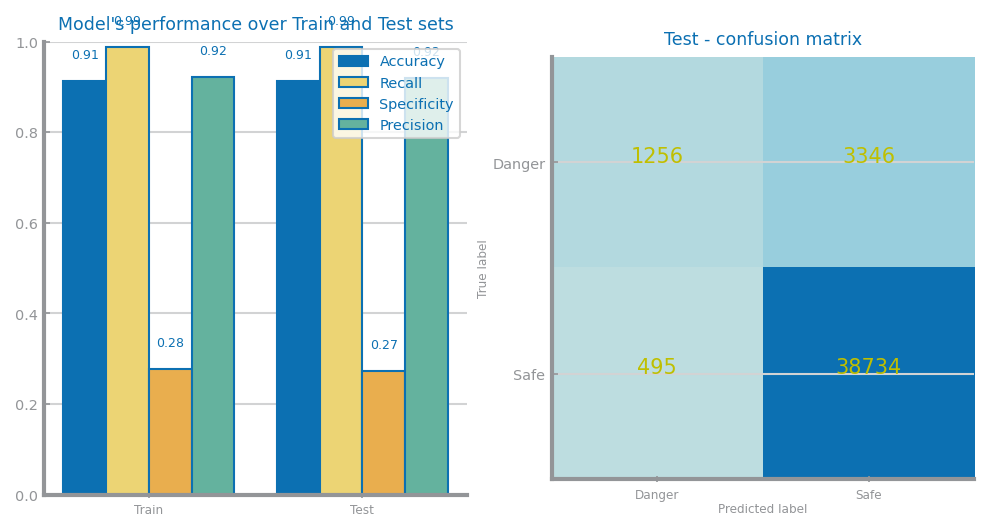

In [ ]:
train_minmax: DataFrame = read_csv(f'{filename_minmax}_train.csv')
test_minmax: DataFrame = read_csv(f'{filename_minmax}_test.csv')

print(len(train_minmax.columns) == len(test_minmax.columns))

#train_zscore.drop(['CRASH_DATE','CRASH_TIME','PERSON_ID'], axis=1, inplace=True)
#test_zscore.drop(['CRASH_DATE','CRASH_TIME'],axis=1, inplace=True) #,'PERSON_ID'

print(len(train_minmax.columns) == len(test_minmax.columns))

trnY_minmax: np.ndarray = train_minmax.pop(target).values
trnX_minmax: np.ndarray = train_minmax.values
labels = unique(trnY_minmax)
labels.sort()

tstY_minmax: np.ndarray = test_minmax.pop(target).values
tstX_minmax: np.ndarray = test_minmax.values

clf = MultinomialNB()
clf.fit(trnX_minmax, trnY_minmax)
prd_trn = clf.predict(trnX_minmax)
prd_tst = clf.predict(tstX_minmax)
print(f1_score(tstY_minmax, prd_tst, pos_label='Danger'))
plot_evaluation_results(labels, trnY_minmax, prd_trn, tstY_minmax, prd_tst)
savefig('lab3_imagens/air_quality_nb_best_minmax.png')
show()

### Naive Bayes Study MINMAX

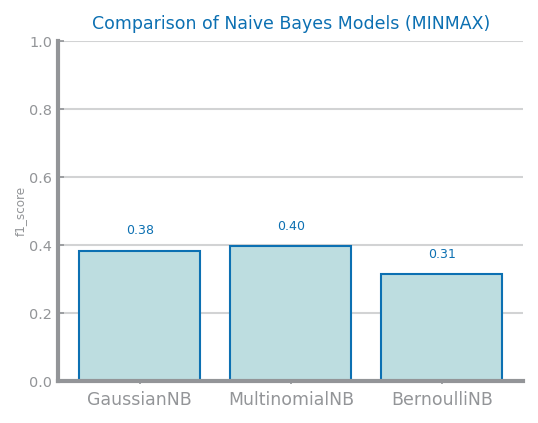

In [ ]:
#MINMAX STUDY
from libs.ds_charts import bar_chart
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX_minmax, trnY_minmax)
    prdY = estimators[clf].predict(tstX_minmax)
    yvalues.append(f1_score(tstY_minmax, prdY, pos_label='Danger'))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (MINMAX)', ylabel='f1_score', percentage=True)
savefig(f'lab3_imagens/minmax_nb_study.png')
show()

### Naive Bayes Study ZSCORE

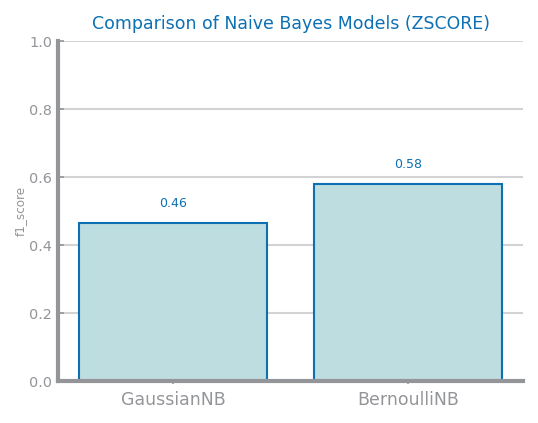

In [ ]:
#ZSCORE STUDY
from libs.ds_charts import bar_chart
estimators = {'GaussianNB': GaussianNB(),
              'BernoulliNB': BernoulliNB()
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX_zscore, trnY_zscore)
    prdY = estimators[clf].predict(tstX_zscore)
    yvalues.append(f1_score(tstY_zscore, prdY, pos_label='Danger'))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (ZSCORE)', ylabel='f1_score', percentage=True)
savefig(f'lab3_imagens/zscore_nb_study.png')
show()